# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [1]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>
### Задача 1.

На занятии мы уже <a href="https://miptstats.github.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [3]:
df = pd.read_csv('titanic_data/train.csv', index_col=0)

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [4]:
df_train = df.sample(frac=0.7)
df_test = df.drop(df_train.index)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [5]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [6]:
new_df_train, train_target = get_features_and_target(df_train)
new_df_test, test_target = get_features_and_target(df_test)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

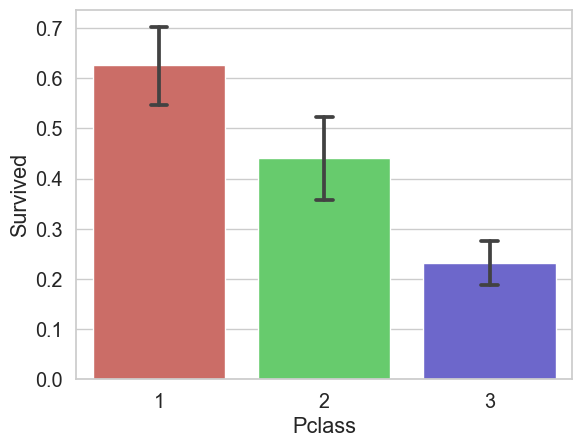

In [7]:
sns.barplot(x=new_df_train['Pclass'], y=train_target, capsize=0.1, palette='hls')

На графике видно, что людей в 1-ом классе выжило намного больше в процентном соотношении, чем людей 3-ем классе. Люди из 2-ого класса выживали с вероятностью примерно 50 процентов.

In [8]:
bin_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
age_group_df = pd.DataFrame(new_df_test['Age'].fillna(new_df_train['Age'].mean(), inplace=True))
age_group_df['AgeGroup'] = pd.cut(new_df_train['Age'], labels=bin_labels, bins=5)

/var/folders/1w/v_pdz1hx607dnqpw4pt35zlm0000gn/T/ipykernel_5004/3197169221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group_df = pd.DataFrame(new_df_test['Age'].fillna(new_df_train['Age'].mean(), inplace=True))


Здесь я разделил людей на группы по возрасту 1-ая группа 0-20 лет, 2-ая группа 20-40 лет и т.д.

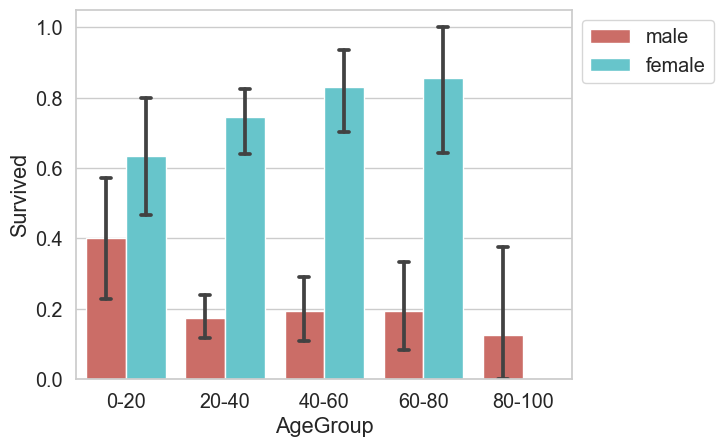

In [9]:
sns.barplot(x=age_group_df['AgeGroup'], y=train_target, capsize=0.1, palette='hls', hue=new_df_train['Sex'])
plt.legend(bbox_to_anchor=(1, 1))

На графике видно, что женщин выживает намного больше, в процентном соотношении, чем мужчин.
Так же можно отметить, что мужчин возрастом до 20 лет выживает ощутимо больше, чем мужчин возрастом старше

#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

##### Делим сначала по полу, потом возрасту
Мужчин старше 20-ти лет "убиваем"


**Дерево 2:**

##### Делим по классу
Людей из 3-его класса "убиваем"

*Деревья были сделаны таким образом, исходя из максимальной простоты и эффективности таких деревьев*

Реализуйте полученные деревья по шаблону

In [50]:
def apply_func_sex_age_copy(column):
    age = column['Age']
    sex = column['Sex']
    if age is np.nan:
        age = new_df_train['Age'].mean()
    if sex == 'male':
        if age >= 20:
            return 0
        else:
            return 1
    else:
        return 1

In [44]:
def tree_sex_age(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    data = features.apply(apply_func_sex_age_copy, axis=1)
    return pd.Series(data)

In [45]:
def apply_func_tree_class(column):
    pclass = column['Pclass']
    if pclass == 3:
        return 0
    else:
        return 1

In [46]:
def tree_class(features):
    data = features.apply(apply_func_tree_class, axis=1)
    return pd.Series(data)

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**
Возьмем количество совпавших "Survived" с правильными данными и поделим на общее число людей. Таким образом получим процентное соотношение, чем ближе оно к единице, тем лучше.

Реализуйте данный критерий по шаблону

In [52]:
def criteria(target : pd.Series, predicted : pd.Series):
    '''
    Вычисление критерия качества для предсказания predicted,
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    compare = (target == predicted)
    return compare.mean()

 Посчитайте качество полученных ранее деревьев.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [56]:
criteria(test_target.copy(), tree_sex_age(new_df_test.copy()))

0.7528089887640449

In [57]:
criteria(test_target.copy(), tree_class(new_df_test.copy()))

0.6816479400749064

Видим, что качество первого дерева немного лучше, что логично, потому что там используется 2 признака, а не 1, как во втором дереве.
Хочу сказать, что деревья я составлял как можно проще и нагляднее, по этому результаты не такие хорошие, как могли бы быть.

**5. Метод ближайшего соседа**

В домашнем задании 1 вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [175]:
# Функция взята из 1-ого контеста
def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
    B = B[:, np.newaxis, :]
    A = A[np.newaxis, :, :]
    temp = np.sqrt(((A - B) * (A - B)).sum(axis=2))
    res = np.argsort(temp)
    return res[0:len(res), 0:k]

In [176]:
def knn(features, train_features, train_target, k):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''

    data_ = {}

    copy_train_features = train_features.copy()
    copy_features = features.copy()

    copy_features['Sex'] = copy_features['Sex'].apply(lambda x: 0 if x == 'female' else 1)
    copy_train_features['Sex'] = copy_train_features['Sex'].apply(lambda x : 0 if x == 'female' else 1)

    nearest_neighbors = find_nearest_points(copy_train_features.to_numpy(), copy_features.to_numpy(), k)

    for k in range(len(nearest_neighbors)):
        final_result = train_target.iloc[nearest_neighbors[k]].value_counts().head(1)
        idx = features.index[k]
        data_[idx] = final_result.index[0]
    return pd.Series(data=data_)

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

In [177]:
criteria_dict_result = {}
for i in range(1, 11):
    criteria_dict_result[i] = criteria(test_target, knn(new_df_test, new_df_train, train_target, i))
criteria_dict_result = pd.Series(criteria_dict_result)
res_criteria_df = pd.DataFrame({'index':criteria_dict_result.index, 'value':criteria_dict_result.values})

/Users/fomin_ivan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Значение критерия')

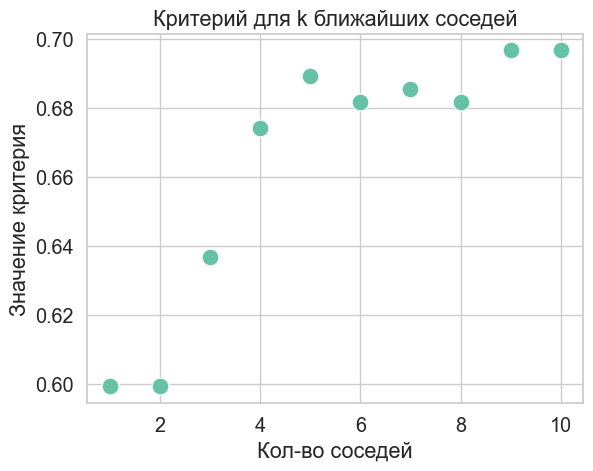

In [178]:
fig, ax = plt.subplots()
sns.scatterplot(res_criteria_df['index'], res_criteria_df['value'], s=150)
ax.set_title('Критерий для k ближайших соседей')
ax.set_xlabel('Кол-во соседей')
ax.set_ylabel('Значение критерия')

Из графика виднеется некоторая закономерность -- чем больше k(кол-во ближайших соседей), тем больше значение критерия. Что говорит нам о том, что для наиболее точной оценки, использовать k = 1 нецелесообразно. При k = 5-7 мы доходим до оптимального значения критерия в том смысле, что значение критерия достаточно высокое, а так много ресурсов для подсчета, как для k=10, не нужно.

#### 6. Выводы

В данной задаче были найдены некоторые закономерности в данных, которые можно использовать для "Угадывания" умрет человек на титанике, или выживет. Я использовал такие признаки, как возраст, пол и класс. Из данных удалось понять, что спасались чаще всего женщины и дети. А также чем выше класс, тем больше вероятность того, что он выживет.
Так же в конце я использовал *метод ближайшего соседа* и по критерию, который я предложил, удалось узнать, что чем больше k, тем точнее будет работать метод, но надо соблюдать баланс, чтобы не тратить ресурсы эффективно.
Если сравнить *метод ближайшего соседа* и мои *решающие деревья*, то видно, что мои деревья работаю или так же, или чуть лучше(качество работы определяется, предложенным мной, критерием).


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

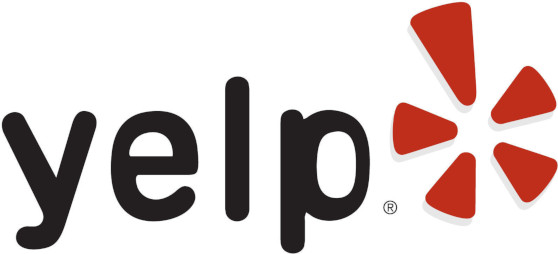

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [58]:
df_yelp_business = pd.read_csv('yelp_data/yelp_business.csv', index_col=0)
df_yelp_business.head()

business_id                        name neighborhood  \
0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"          NaN   
1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"          NaN   
2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"          NaN   
3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"          NaN   
4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"          NaN   

                            address            city state postal_code  \
0        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1              "3101 Washington Rd"        McMurray    PA       15317   
2          "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                    "581 Howe Ave"  Cuyahoga Falls    OH       44221   

    latitude   longitude  is_open  \
0  33.330690 -111.978599        1   
1  40.291685  -80.104900        1   
2  33.524903 -112.115310        1   
3  33.383147 -111.964725        0   
4  41.119535  -81.475690        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [64]:
sort_df = df_yelp_business.groupby('city').count().sort_values(['business_id'], ascending=False)
sort_df['is_open'].head(5)

city
Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: is_open, dtype: int64

In [180]:
N = sort_df.head(1).index[0]
N

'Las Vegas'

Город с наибольшим количеством компаний - Las Vegas

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [181]:
df_yelp_business = df_yelp_business[df_yelp_business['city'] == N]

Text(0.5, 1.0, 'Расположение по координатам')

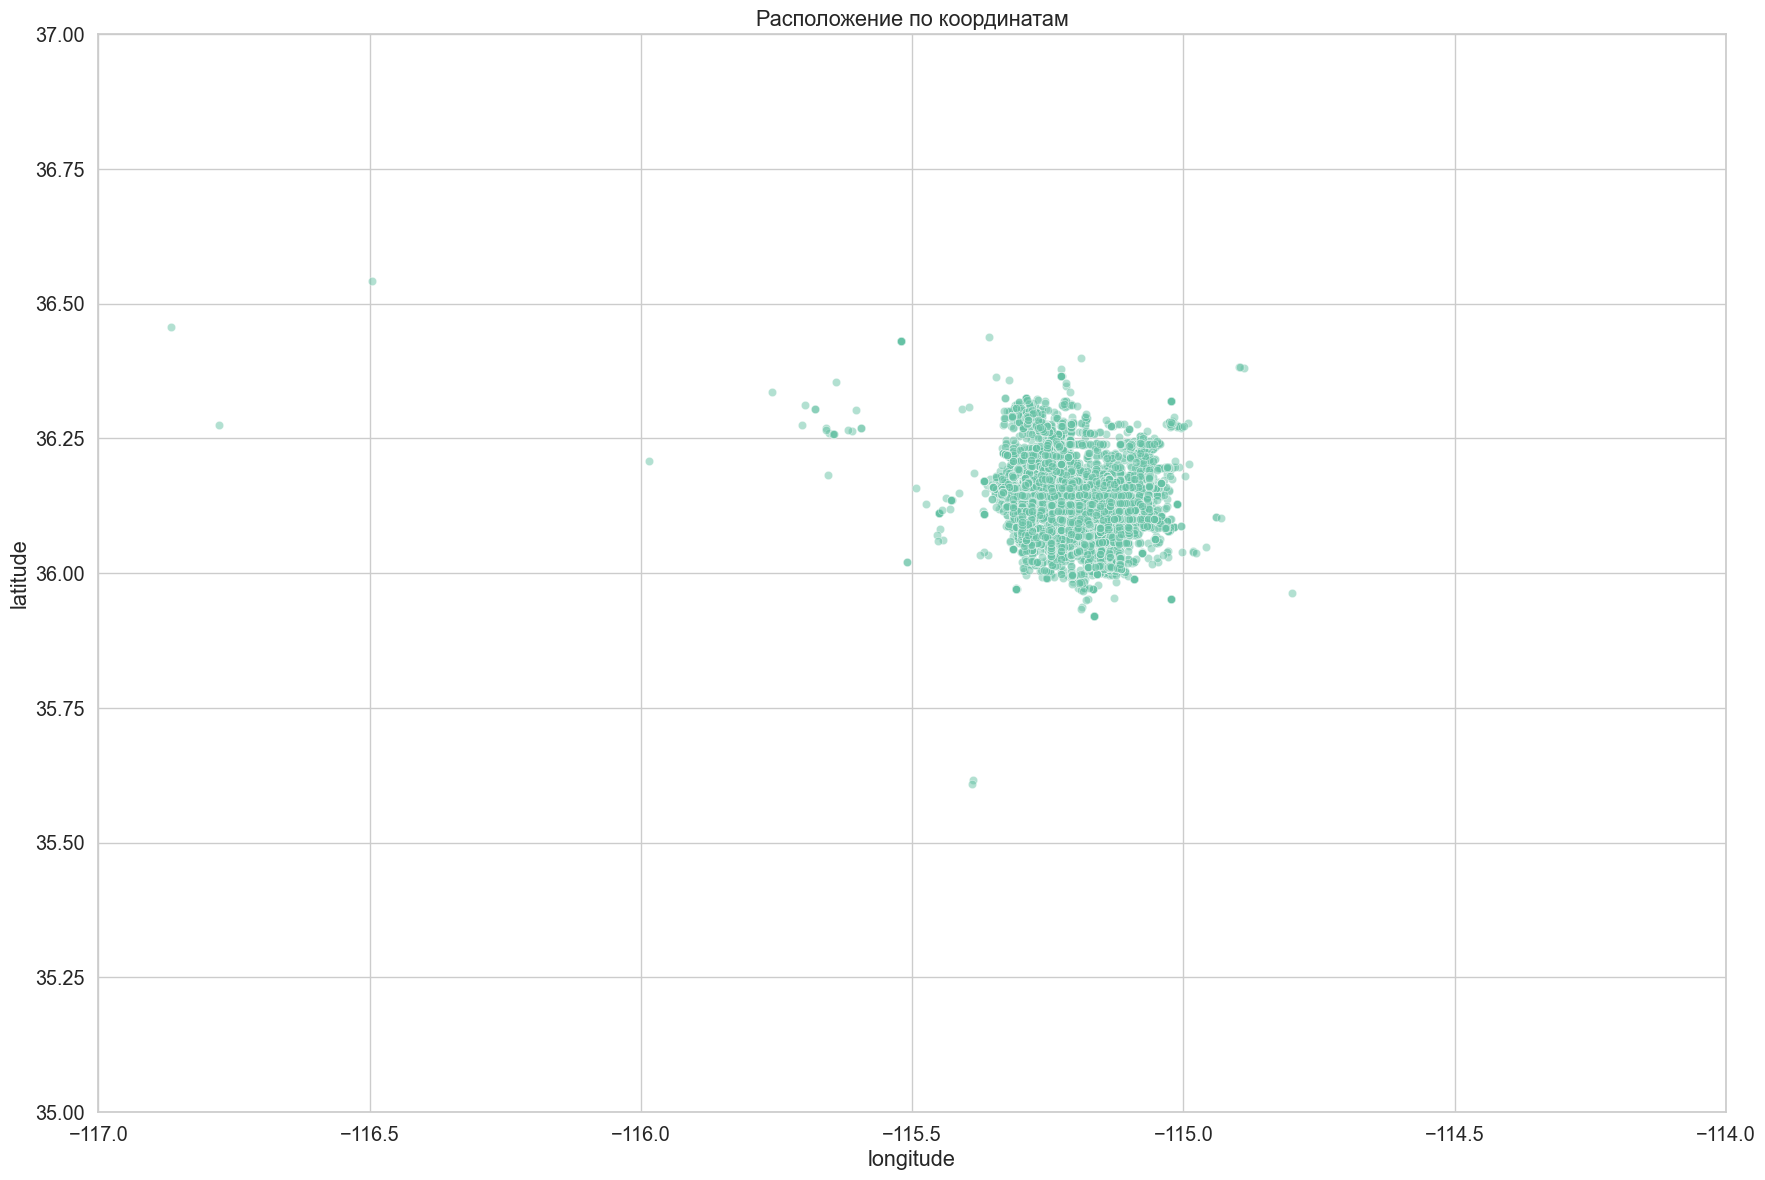

In [182]:
plt.figure(figsize=(21, 14))
sns.scatterplot(data=df_yelp_business, x='longitude', y='latitude', alpha=0.5)
plt.ylim(35, 37)
plt.xlim(-117, -114)
plt.title('Расположение по координатам')

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

Text(0.5, 1.0, 'Расположение по координатам')

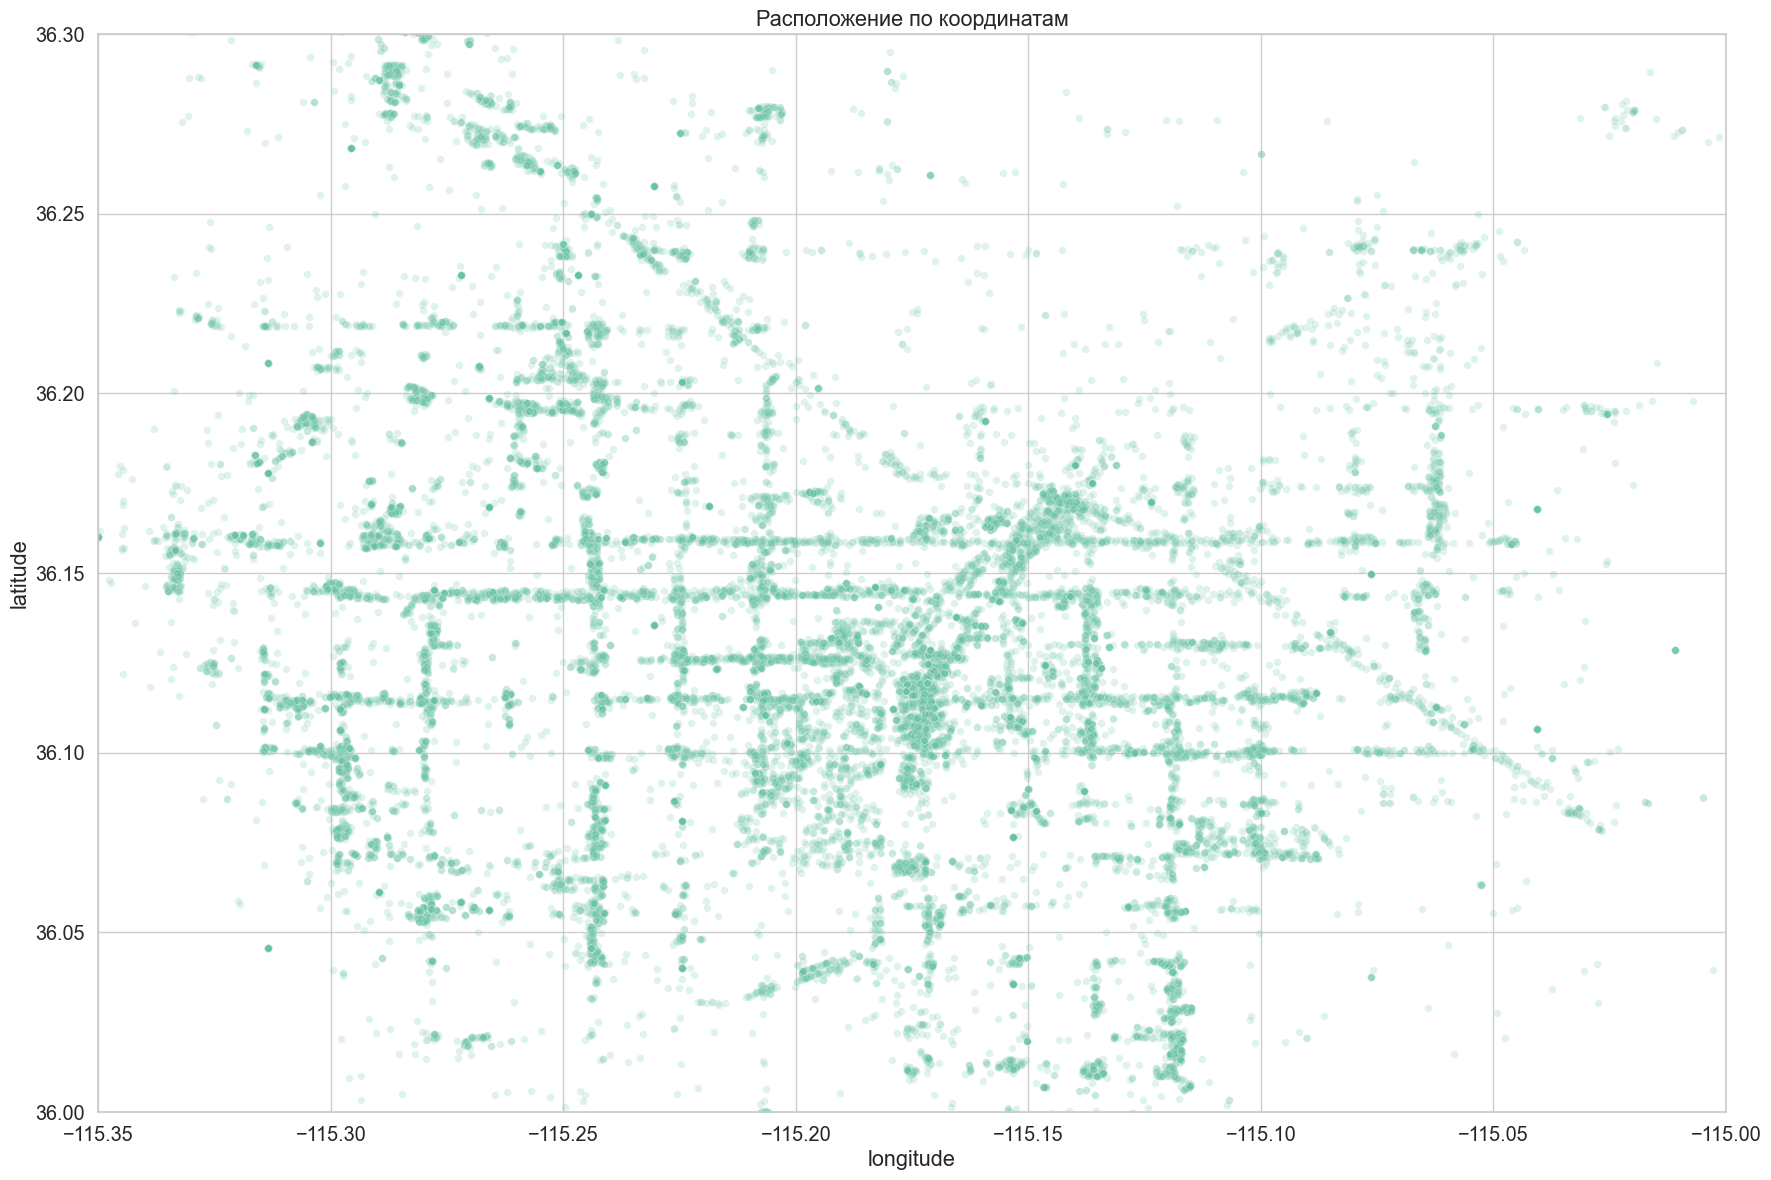

In [183]:
plt.figure(figsize=(21, 14))
sns.scatterplot(data=df_yelp_business, x='longitude', y='latitude', alpha=0.2, s=30)
plt.ylim(36, 36.3)
plt.xlim(-115.35, -115)
plt.title('Расположение по координатам')

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб. Рекомендуется сохранить карту в html и отправить ее отдельным файлом в бот.

In [184]:
import plotly.express as px

In [185]:
fig = px.scatter_mapbox(
    data_frame=df_yelp_business,
    lat='latitude', lon='longitude',
    center=dict(lat=36.13, lon=-115.15),
    mapbox_style="stamen-terrain",
    zoom=10,
)
fig.show()
fig.write_html("map.html")

Если все получилось, вы молодцы! Далее в этой задаче тоже можно делать интерактивные карты.

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [186]:
df_yelp_review = pd.read_csv('yelp_data/yelp_review.csv', index_col=0)

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [187]:
df_yelp_review = df_yelp_review.set_index('business_id').loc[df_yelp_business['business_id'].to_list()]

In [188]:
df_yelp_review.reset_index(inplace=True)

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [189]:
df_yelp_review = df_yelp_review.groupby('business_id').aggregate([np.mean, np.size])
df_yelp_review.head()

stars      
                            mean  size
business_id                           
--9e1ONYQuAa-CB_Rrw7Tw  4.088904  1451
--DdmeR16TRb3LsjG0ejrQ  3.200000     5
--WsruI0IGEoeRmkErU5Gg  4.928571    14
--Y7NhBKzLTbNliMUX_wfg  4.875000     8
--e8PjCNhEz32pprnPhCwQ  3.473684    19

stars      
                            mean  size
business_id                           
--9e1ONYQuAa-CB_Rrw7Tw  4.088904  1451
--DdmeR16TRb3LsjG0ejrQ  3.200000     5
--WsruI0IGEoeRmkErU5Gg  4.928571    14
--Y7NhBKzLTbNliMUX_wfg  4.875000     8
--e8PjCNhEz32pprnPhCwQ  3.473684    19

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [190]:
df_yelp_review.columns = ['stars', 'count']

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [191]:
df_yelp_review.sort_index(inplace=True)

In [192]:
df_yelp_business.sort_values('business_id', inplace=True)
df_yelp_business.set_index('business_id', inplace=True)

In [193]:
df_yelp = df_yelp_business.join(df_yelp_review)
df_yelp.head()

name   neighborhood  \
business_id                                                                
--9e1ONYQuAa-CB_Rrw7Tw             "Delmonico Steakhouse"      The Strip   
--DdmeR16TRb3LsjG0ejrQ         "World Food Championships"      The Strip   
--WsruI0IGEoeRmkErU5Gg             "Dial Carpet Cleaning"       Westside   
--Y7NhBKzLTbNliMUX_wfg             "Pinnacle Restoration"  Spring Valley   
--e8PjCNhEz32pprnPhCwQ  "Lucky's Pet Grooming & Boutique"       Downtown   

                                           address       city state  \
business_id                                                           
--9e1ONYQuAa-CB_Rrw7Tw     "3355 Las Vegas Blvd S"  Las Vegas    NV   
--DdmeR16TRb3LsjG0ejrQ     "3645 Las Vegas Blvd S"  Las Vegas    NV   
--WsruI0IGEoeRmkErU5Gg  "3111 S Valley Vw, #H-104"  Las Vegas    NV   
--Y7NhBKzLTbNliMUX_wfg                          ""  Las Vegas    NV   
--e8PjCNhEz32pprnPhCwQ    "1460 E Charleston Blvd"  Las Vegas    NV   

                       postal_code   latitude   longitude  is_open  \
business_id                                                          
--9e1ONYQuAa-CB_Rrw7Tw       89109  36.123183 -115.169190        1   
--DdmeR16TRb3LsjG0ejrQ       89109  36.114277 -115.170975        1   
--WsruI0IGEoeRmkErU5Gg       89102  36.130899 -115.190785        1   
--Y7NhBKzLTbNliMUX_wfg       89148  36.061235 -115.289685        1   
--e8PjCNhEz32pprnPhCwQ       89104  36.158851 -115.133272        1   

                                                               categories  \
business_id                                                                 
--9e1ONYQuAa-CB_Rrw7Tw               Cajun/Creole;Steakhouses;Restaurants   
--DdmeR16TRb3LsjG0ejrQ                     Arts & Entertainment;Festivals   
--WsruI0IGEoeRmkErU5Gg                     Carpet Cleaning;Local Services   
--Y7NhBKzLTbNliMUX_wfg  Drywall Installation & Repair;Handyman;Home Se...   
--e8PjCNhEz32pprnPhCwQ          Pets;Pet Groomers;Pet Services;Pet Stores   

                           stars  count  
business_id                              
--9e1ONYQuAa-CB_Rrw7Tw  4.088904   1451  
--DdmeR16TRb3LsjG0ejrQ  3.200000      5  
--WsruI0IGEoeRmkErU5Gg  4.928571     14  
--Y7NhBKzLTbNliMUX_wfg  4.875000      8  
--e8PjCNhEz32pprnPhCwQ  3.473684     19

name   neighborhood  \
business_id                                                                
--9e1ONYQuAa-CB_Rrw7Tw             "Delmonico Steakhouse"      The Strip   
--DdmeR16TRb3LsjG0ejrQ         "World Food Championships"      The Strip   
--WsruI0IGEoeRmkErU5Gg             "Dial Carpet Cleaning"       Westside   
--Y7NhBKzLTbNliMUX_wfg             "Pinnacle Restoration"  Spring Valley   
--e8PjCNhEz32pprnPhCwQ  "Lucky's Pet Grooming & Boutique"       Downtown   

                                           address       city state  \
business_id                                                           
--9e1ONYQuAa-CB_Rrw7Tw     "3355 Las Vegas Blvd S"  Las Vegas    NV   
--DdmeR16TRb3LsjG0ejrQ     "3645 Las Vegas Blvd S"  Las Vegas    NV   
--WsruI0IGEoeRmkErU5Gg  "3111 S Valley Vw, #H-104"  Las Vegas    NV   
--Y7NhBKzLTbNliMUX_wfg                          ""  Las Vegas    NV   
--e8PjCNhEz32pprnPhCwQ    "1460 E Charleston Blvd"  Las Vegas    NV   

                       postal_code   latitude   longitude  is_open  \
business_id                                                          
--9e1ONYQuAa-CB_Rrw7Tw       89109  36.123183 -115.169190        1   
--DdmeR16TRb3LsjG0ejrQ       89109  36.114277 -115.170975        1   
--WsruI0IGEoeRmkErU5Gg       89102  36.130899 -115.190785        1   
--Y7NhBKzLTbNliMUX_wfg       89148  36.061235 -115.289685        1   
--e8PjCNhEz32pprnPhCwQ       89104  36.158851 -115.133272        1   

                                                               categories  \
business_id                                                                 
--9e1ONYQuAa-CB_Rrw7Tw               Cajun/Creole;Steakhouses;Restaurants   
--DdmeR16TRb3LsjG0ejrQ                     Arts & Entertainment;Festivals   
--WsruI0IGEoeRmkErU5Gg                     Carpet Cleaning;Local Services   
--Y7NhBKzLTbNliMUX_wfg  Drywall Installation & Repair;Handyman;Home Se...   
--e8PjCNhEz32pprnPhCwQ          Pets;Pet Groomers;Pet Services;Pet Stores   

                           stars  count  
business_id                              
--9e1ONYQuAa-CB_Rrw7Tw  4.088904   1451  
--DdmeR16TRb3LsjG0ejrQ  3.200000      5  
--WsruI0IGEoeRmkErU5Gg  4.928571     14  
--Y7NhBKzLTbNliMUX_wfg  4.875000      8  
--e8PjCNhEz32pprnPhCwQ  3.473684     19

In [194]:
drop_columns = ['neighborhood', 'address', 'city', 'state', 'postal_code', 'is_open']
df_yelp.drop(drop_columns, axis='columns', inplace=True)
df_yelp.head()

name   latitude  \
business_id                                                            
--9e1ONYQuAa-CB_Rrw7Tw             "Delmonico Steakhouse"  36.123183   
--DdmeR16TRb3LsjG0ejrQ         "World Food Championships"  36.114277   
--WsruI0IGEoeRmkErU5Gg             "Dial Carpet Cleaning"  36.130899   
--Y7NhBKzLTbNliMUX_wfg             "Pinnacle Restoration"  36.061235   
--e8PjCNhEz32pprnPhCwQ  "Lucky's Pet Grooming & Boutique"  36.158851   

                         longitude  \
business_id                          
--9e1ONYQuAa-CB_Rrw7Tw -115.169190   
--DdmeR16TRb3LsjG0ejrQ -115.170975   
--WsruI0IGEoeRmkErU5Gg -115.190785   
--Y7NhBKzLTbNliMUX_wfg -115.289685   
--e8PjCNhEz32pprnPhCwQ -115.133272   

                                                               categories  \
business_id                                                                 
--9e1ONYQuAa-CB_Rrw7Tw               Cajun/Creole;Steakhouses;Restaurants   
--DdmeR16TRb3LsjG0ejrQ                     Arts & Entertainment;Festivals   
--WsruI0IGEoeRmkErU5Gg                     Carpet Cleaning;Local Services   
--Y7NhBKzLTbNliMUX_wfg  Drywall Installation & Repair;Handyman;Home Se...   
--e8PjCNhEz32pprnPhCwQ          Pets;Pet Groomers;Pet Services;Pet Stores   

                           stars  count  
business_id                              
--9e1ONYQuAa-CB_Rrw7Tw  4.088904   1451  
--DdmeR16TRb3LsjG0ejrQ  3.200000      5  
--WsruI0IGEoeRmkErU5Gg  4.928571     14  
--Y7NhBKzLTbNliMUX_wfg  4.875000      8  
--e8PjCNhEz32pprnPhCwQ  3.473684     19

name   latitude  \
business_id                                                            
--9e1ONYQuAa-CB_Rrw7Tw             "Delmonico Steakhouse"  36.123183   
--DdmeR16TRb3LsjG0ejrQ         "World Food Championships"  36.114277   
--WsruI0IGEoeRmkErU5Gg             "Dial Carpet Cleaning"  36.130899   
--Y7NhBKzLTbNliMUX_wfg             "Pinnacle Restoration"  36.061235   
--e8PjCNhEz32pprnPhCwQ  "Lucky's Pet Grooming & Boutique"  36.158851   

                         longitude  \
business_id                          
--9e1ONYQuAa-CB_Rrw7Tw -115.169190   
--DdmeR16TRb3LsjG0ejrQ -115.170975   
--WsruI0IGEoeRmkErU5Gg -115.190785   
--Y7NhBKzLTbNliMUX_wfg -115.289685   
--e8PjCNhEz32pprnPhCwQ -115.133272   

                                                               categories  \
business_id                                                                 
--9e1ONYQuAa-CB_Rrw7Tw               Cajun/Creole;Steakhouses;Restaurants   
--DdmeR16TRb3LsjG0ejrQ                     Arts & Entertainment;Festivals   
--WsruI0IGEoeRmkErU5Gg                     Carpet Cleaning;Local Services   
--Y7NhBKzLTbNliMUX_wfg  Drywall Installation & Repair;Handyman;Home Se...   
--e8PjCNhEz32pprnPhCwQ          Pets;Pet Groomers;Pet Services;Pet Stores   

                           stars  count  
business_id                              
--9e1ONYQuAa-CB_Rrw7Tw  4.088904   1451  
--DdmeR16TRb3LsjG0ejrQ  3.200000      5  
--WsruI0IGEoeRmkErU5Gg  4.928571     14  
--Y7NhBKzLTbNliMUX_wfg  4.875000      8  
--e8PjCNhEz32pprnPhCwQ  3.473684     19

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

Text(0.5, 1.0, 'Средняя оценка компаний')

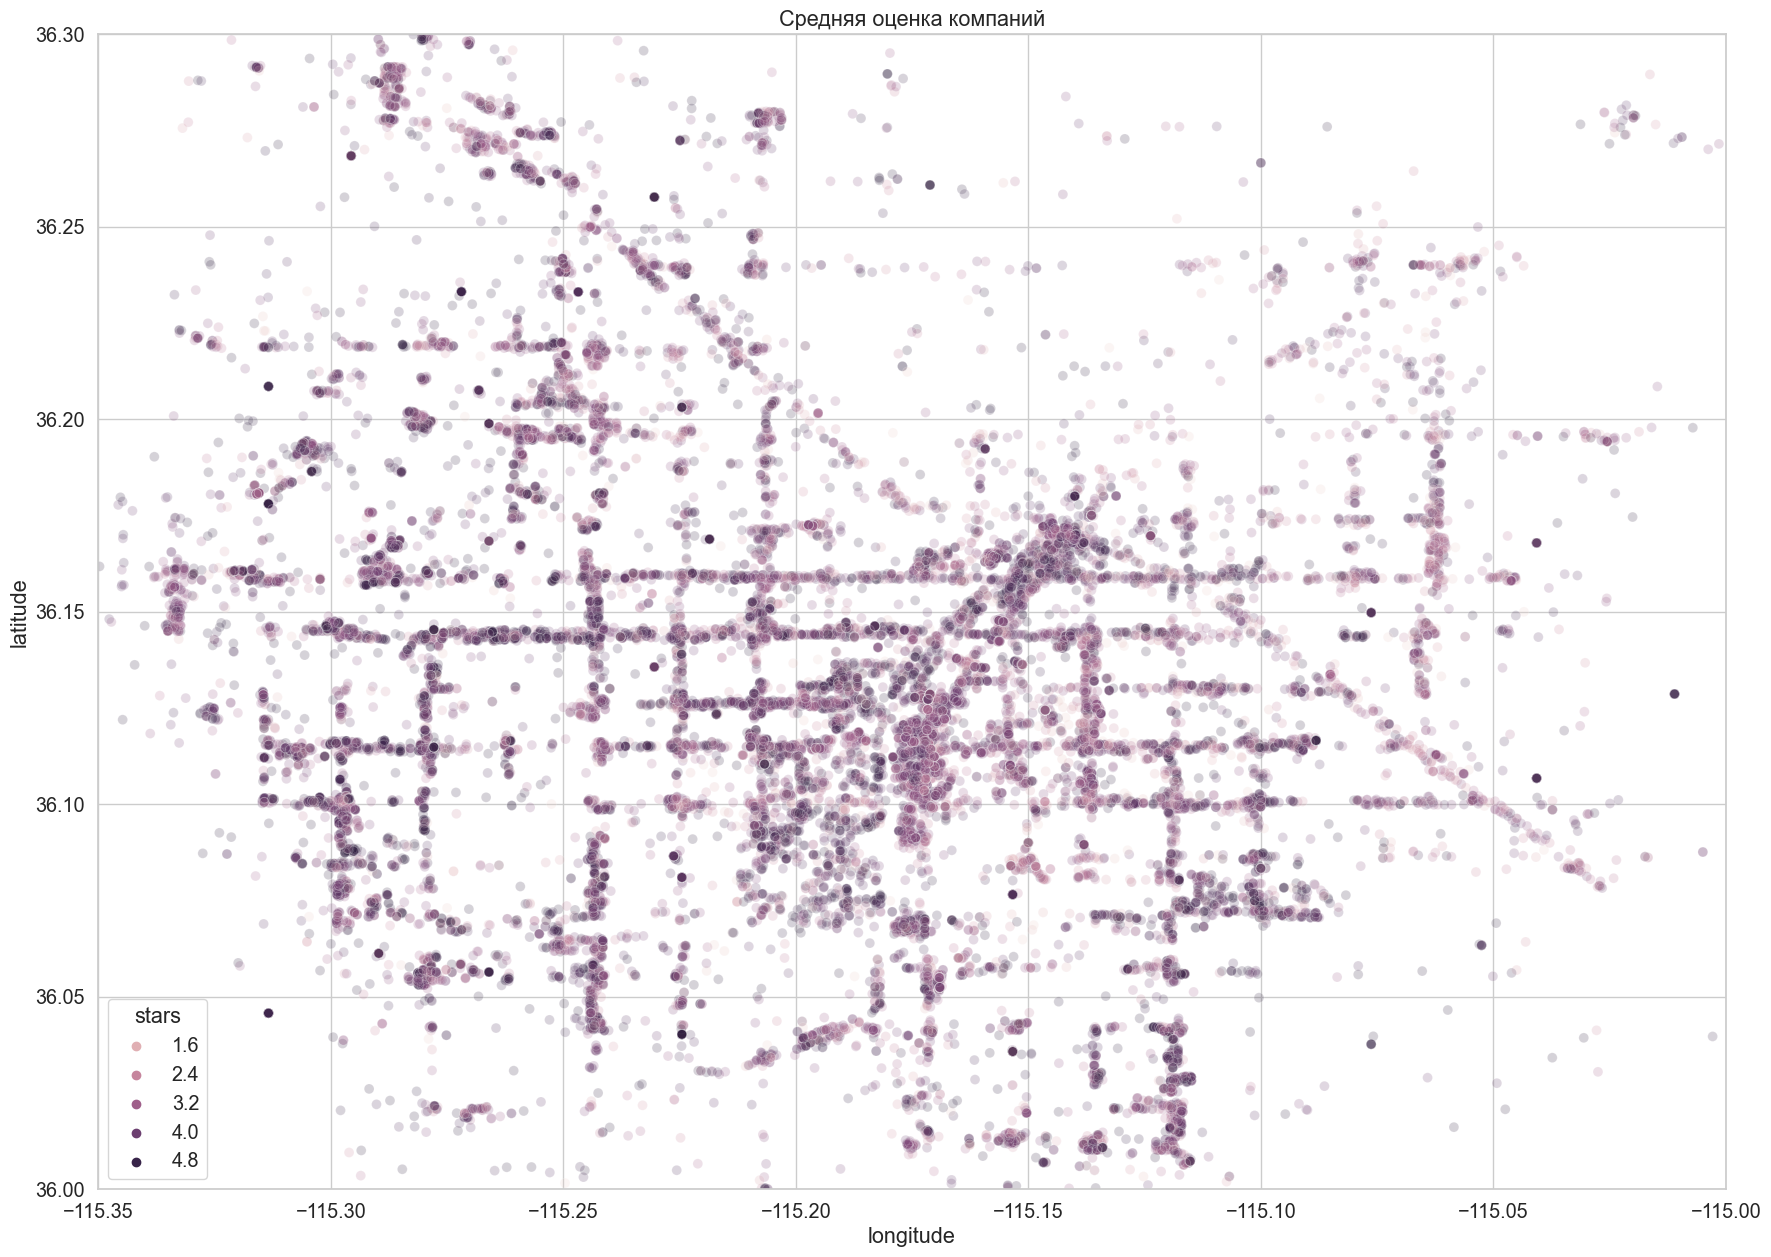

In [214]:
plt.figure(figsize=(21, 15))
sns.scatterplot(data=df_yelp, x='longitude', y='latitude', alpha=0.2, hue='stars', s=50)
plt.ylim(36, 36.3)
plt.xlim(-115.35, -115)
plt.title('Средняя оценка компаний')

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [196]:
df_yelp = df_yelp[df_yelp['latitude'] <= 36.3] \
                 [df_yelp['latitude'] >= 36] \
                 [df_yelp['longitude'] <= -115] \
                 [df_yelp['longitude'] >= -115.35]

/var/folders/1w/v_pdz1hx607dnqpw4pt35zlm0000gn/T/ipykernel_22796/284003540.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/1w/v_pdz1hx607dnqpw4pt35zlm0000gn/T/ipykernel_22796/284003540.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [215]:
df_yelp_district = df_yelp.copy()
df_yelp_district['latitude'] = df_yelp_district['latitude'].apply(lambda x : np.round(x*4, decimals=1)*0.25)
df_yelp_district['longitude'] = df_yelp_district['longitude'].apply(lambda x : np.round(x*4, decimals=1)*0.25)
df_yelp_district.head()

name  latitude  \
business_id                                                           
--9e1ONYQuAa-CB_Rrw7Tw             "Delmonico Steakhouse"    36.125   
--DdmeR16TRb3LsjG0ejrQ         "World Food Championships"    36.125   
--WsruI0IGEoeRmkErU5Gg             "Dial Carpet Cleaning"    36.125   
--Y7NhBKzLTbNliMUX_wfg             "Pinnacle Restoration"    36.050   
--e8PjCNhEz32pprnPhCwQ  "Lucky's Pet Grooming & Boutique"    36.150   

                        longitude  \
business_id                         
--9e1ONYQuAa-CB_Rrw7Tw   -115.175   
--DdmeR16TRb3LsjG0ejrQ   -115.175   
--WsruI0IGEoeRmkErU5Gg   -115.200   
--Y7NhBKzLTbNliMUX_wfg   -115.300   
--e8PjCNhEz32pprnPhCwQ   -115.125   

                                                               categories  \
business_id                                                                 
--9e1ONYQuAa-CB_Rrw7Tw               Cajun/Creole;Steakhouses;Restaurants   
--DdmeR16TRb3LsjG0ejrQ                     Arts & Entertainment;Festivals   
--WsruI0IGEoeRmkErU5Gg                     Carpet Cleaning;Local Services   
--Y7NhBKzLTbNliMUX_wfg  Drywall Installation & Repair;Handyman;Home Se...   
--e8PjCNhEz32pprnPhCwQ          Pets;Pet Groomers;Pet Services;Pet Stores   

                           stars  count  
business_id                              
--9e1ONYQuAa-CB_Rrw7Tw  4.088904   1451  
--DdmeR16TRb3LsjG0ejrQ  3.200000      5  
--WsruI0IGEoeRmkErU5Gg  4.928571     14  
--Y7NhBKzLTbNliMUX_wfg  4.875000      8  
--e8PjCNhEz32pprnPhCwQ  3.473684     19

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

In [198]:
pivot_table = pd.pivot_table(
    data=df_yelp_district,
    index='latitude', columns='longitude',
    values='stars',
    aggfunc='mean'
)

Text(0.5, 1.0, 'Средняя оценка компаний по району')

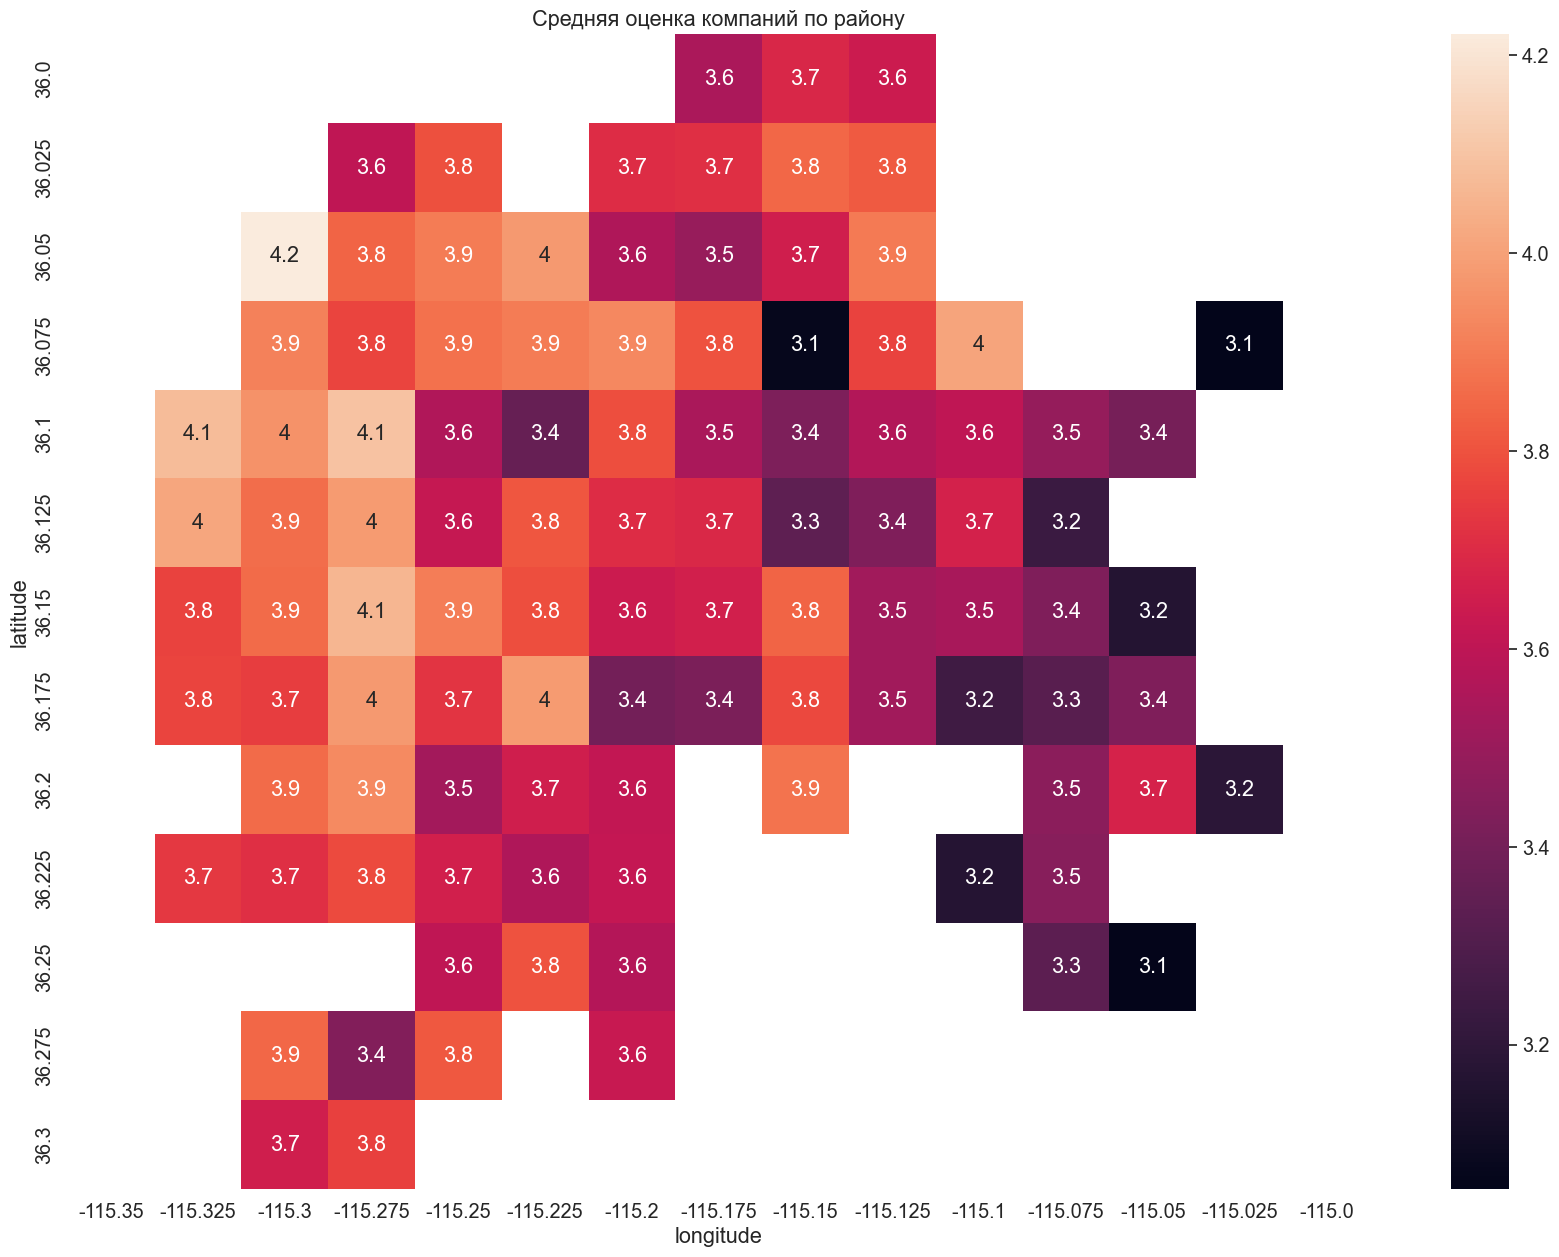

In [216]:
plt.figure(figsize=(21, 15))
ax = sns.heatmap(data=pivot_table, annot=True)
plt.title('Средняя оценка компаний по району')

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** В данном случае оценки компаний большинстве случаев находятся не в диапазоне [2, 5], а в более узком диапазоне. Это делает карту однотонной и малоинформативной.
  Районы с маленьким количеством компаний будут не репрезентативны, так как маленькое количество в районе может говорить о неразвитости бизнеса в районе(например из-за маленького населения), в следствии нет конкуренции, а значит оценки людей находится в вакууме, так как им не с чем сравнить.(Это одна из возможных причин *нерепрезентативности*).

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [200]:
pivot_table_count = pd.pivot_table(
    data=df_yelp_district,
    index='latitude', columns='longitude',
    values='name',
    aggfunc='count'
)

In [201]:
pivot_table = pd.pivot_table(
    data=df_yelp_district,
    index='latitude', columns='longitude',
    values='stars',
    aggfunc='mean'
)

In [202]:
for i in pivot_table_count.index:
    for k in pivot_table_count.columns:
        if 30 > pivot_table_count.at[i, k]:
            pivot_table.at[i, k] = np.nan

Text(0.5, 1.0, 'Средняя оценка компаний по району')

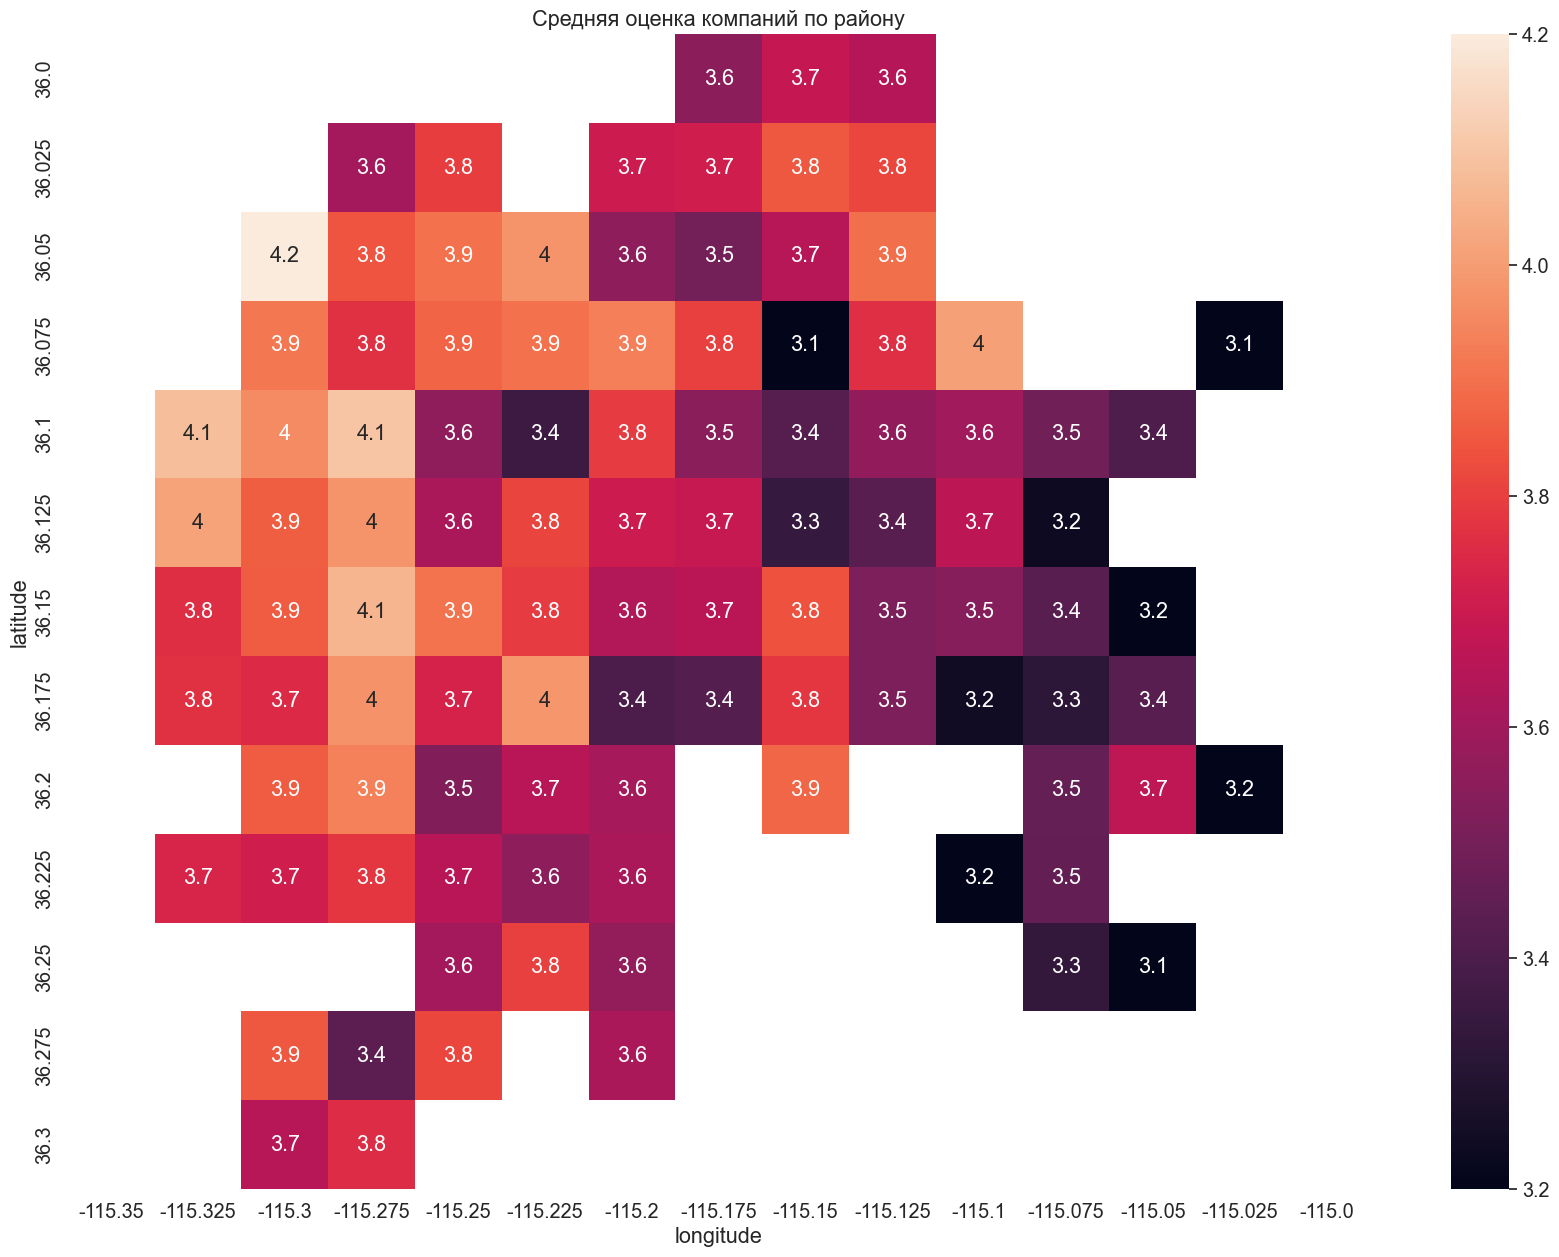

In [217]:
plt.figure(figsize=(21, 15))
ax = sns.heatmap(data=pivot_table, vmin=3.2, vmax=4.2, annot=True)
plt.title('Средняя оценка компаний по району')

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** Теперь график более информативен. Видно, что в центре города компаний больше, чем на окраине, а еще видно сильную разницу между западом города и востоком, на востоке компаний сильно меньше. Также теперь мы можем увидеть, что на западе города оценки в среднем лучше, чем на востоке. Из предыдущего графика эти данные мы бы достали с трудом. Теперь можно сказать, что восточная часть города развита намного меньше западной.

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [204]:
df_restaurant = df_yelp.reset_index()
df_restaurant['categories'] = df_restaurant['categories'].str.lower()
df_restaurant = df_restaurant[df_restaurant['categories'].str.contains(r'\brestaurant')][df_restaurant['count'] >= 5]
df_restaurant = df_restaurant.reset_index(drop=True)
df_restaurant.head()

/var/folders/1w/v_pdz1hx607dnqpw4pt35zlm0000gn/T/ipykernel_22796/3285891119.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



business_id                              name   latitude  \
0  --9e1ONYQuAa-CB_Rrw7Tw            "Delmonico Steakhouse"  36.123183   
1  --q7kSBRb0vWC8lSkXFByA          "Double Play Sports Bar"  36.016693   
2  -153AjTW5luZPK4omEujWA   "Jody Maroni's Sausage Kingdom"  36.103001   
3  -1m9o3vGRA8IBPNvNqKLmA      "Bavette's Steakhouse & Bar"  36.104330   
4  -1vfRrlnNnNJ5boOVghMPA  "Red Ginseng Narita Sushi & BBQ"  36.281295   

    longitude                                         categories     stars  \
0 -115.169190               cajun/creole;steakhouses;restaurants  4.088904   
1 -115.173115       sports bars;pizza;restaurants;nightlife;bars  4.000000   
2 -115.173516                               hot dogs;restaurants  3.000000   
3 -115.175593  african;restaurants;nightlife;bars;steakhouses...  4.736842   
4 -115.286737                      sushi bars;korean;restaurants  3.226667   

   count  
0   1451  
1      7  
2      5  
3     38  
4     75

/var/folders/1w/v_pdz1hx607dnqpw4pt35zlm0000gn/T/ipykernel_22796/3285891119.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



business_id                              name   latitude  \
0  --9e1ONYQuAa-CB_Rrw7Tw            "Delmonico Steakhouse"  36.123183   
1  --q7kSBRb0vWC8lSkXFByA          "Double Play Sports Bar"  36.016693   
2  -153AjTW5luZPK4omEujWA   "Jody Maroni's Sausage Kingdom"  36.103001   
3  -1m9o3vGRA8IBPNvNqKLmA      "Bavette's Steakhouse & Bar"  36.104330   
4  -1vfRrlnNnNJ5boOVghMPA  "Red Ginseng Narita Sushi & BBQ"  36.281295   

    longitude                                         categories     stars  \
0 -115.169190               cajun/creole;steakhouses;restaurants  4.088904   
1 -115.173115       sports bars;pizza;restaurants;nightlife;bars  4.000000   
2 -115.173516                               hot dogs;restaurants  3.000000   
3 -115.175593  african;restaurants;nightlife;bars;steakhouses...  4.736842   
4 -115.286737                      sushi bars;korean;restaurants  3.226667   

   count  
0   1451  
1      7  
2      5  
3     38  
4     75

In [205]:
df_restaurant = df_restaurant[df_restaurant['latitude'] <= 36.3] \
                             [df_restaurant['latitude'] >= 36] \
                             [df_restaurant['longitude'] <= -115] \
                             [df_restaurant['longitude'] >= -115.35]

In [206]:
df_restaurant_district = df_restaurant.copy()
df_restaurant_district['latitude'] = df_restaurant_district['latitude'].apply(lambda x : np.round(x*4, decimals=1)*0.25)
df_restaurant_district['longitude'] = df_restaurant_district['longitude'].apply(lambda x : np.round(x*4, decimals=1)*0.25)

In [207]:
pivot_table_restaurant = pd.pivot_table(
    df_restaurant_district,
    index='latitude', columns='longitude',
    values='stars',
    aggfunc='mean'
)

In [208]:
pivot_table_restaurant_count = pd.pivot_table(
    df_restaurant_district,
    index='latitude', columns='longitude',
    values='business_id',
    aggfunc='count'
)

In [209]:
for i in pivot_table_restaurant_count.index:
    for k in pivot_table_restaurant_count.columns:
        if pivot_table_restaurant_count.at[i, k] < 10:
            pivot_table_restaurant.at[i, k] = np.nan

Text(0.5, 1.0, 'Средняя оценка ресторанов по районам')

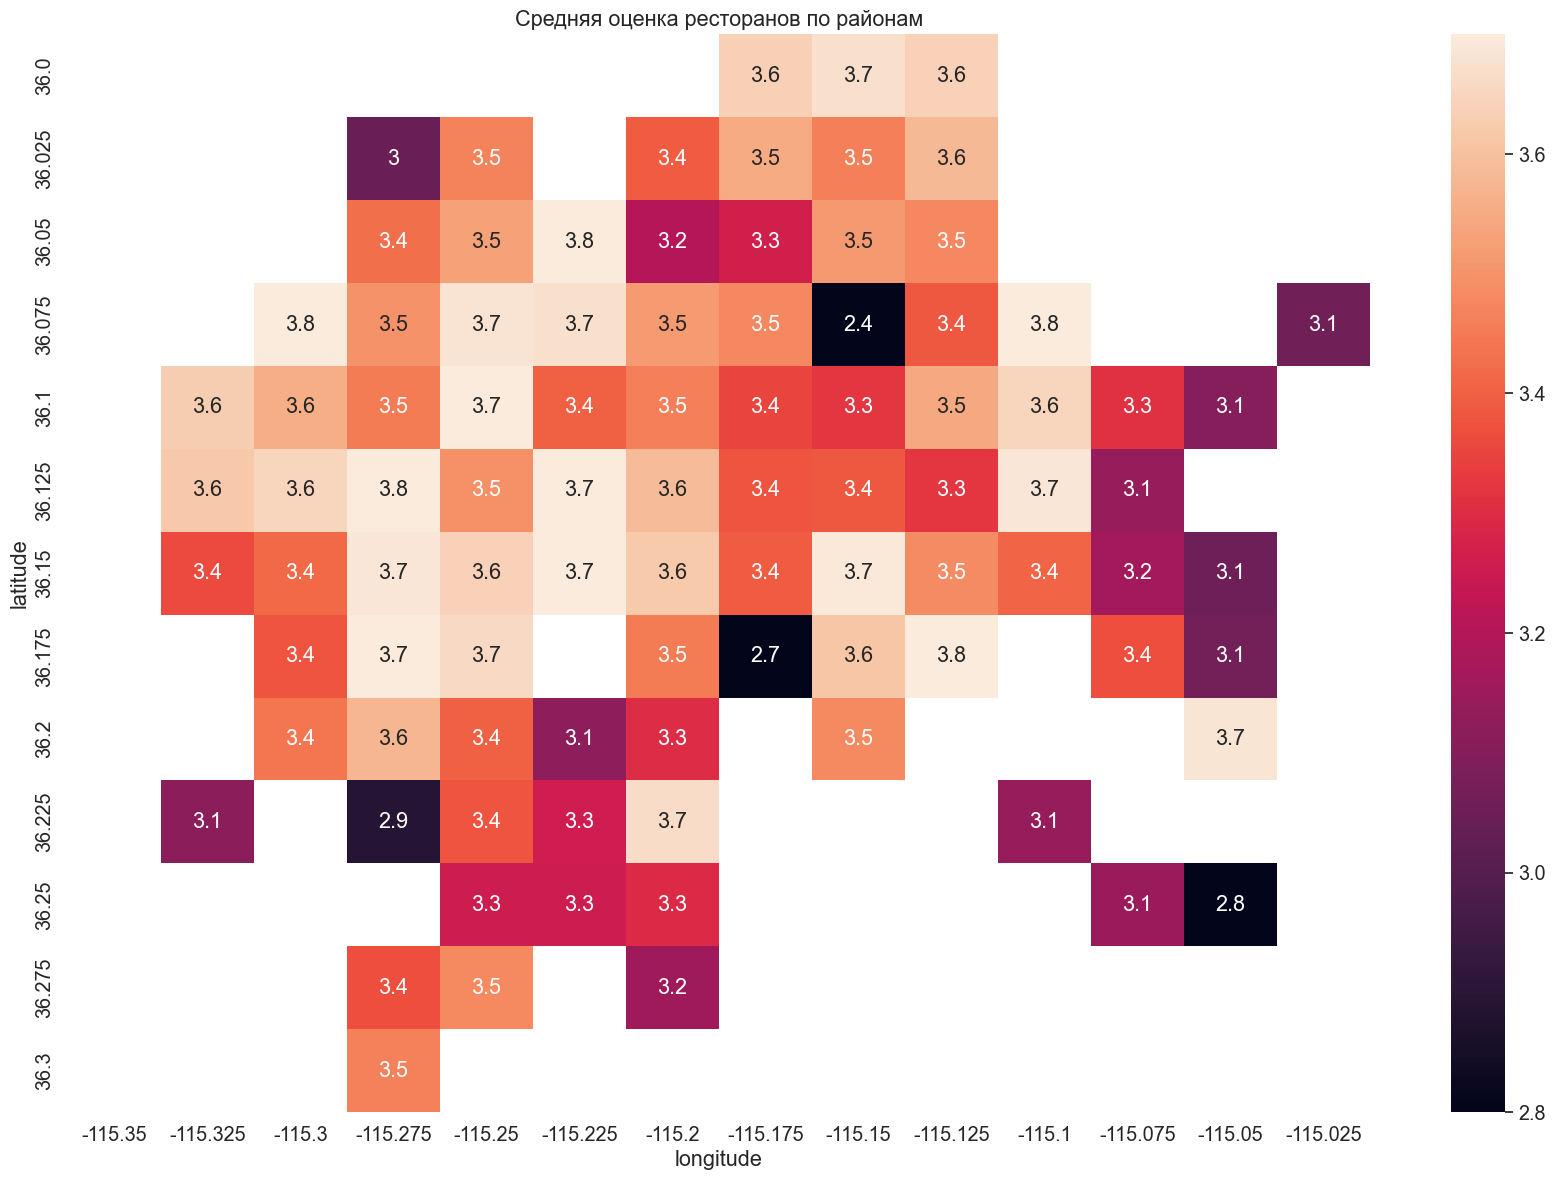

In [218]:
plt.figure(figsize=(21, 14))
sns.heatmap(data=pivot_table_restaurant, annot=True, vmin=2.8, vmax=3.7)
plt.title('Средняя оценка ресторанов по районам')

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** Это дает нам более репрезентативные данные, потому что *рестораны без отзывов* или *только открывшиеся рестораны* не могут нам давать объективные данные по качеству их сервиса(Рестораны должно пройти "проверку временем"). Убираем районы с малым количеством ресторанов, поскольку в этих районах мало развит ресторанный бизнес, а это говорит о малой развитости всего района, возможно в этих районах огромная преступность, возможно там просто живет достаточно мало людей, есть и другие возможные причины. Оценки ресторанов в таких районах не покажут нам картину полностью относительно всех районов. А ведь нам нужно выяснить какой ресторан лучше, а в районе, где их мало, мы этого сделать не сможем.

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [219]:
top_10_restaurants = df_restaurant[df_restaurant['count'] >= 50].sort_values('stars', ascending=False).head(10)
top_10_restaurants = top_10_restaurants.reset_index(drop=True)
top_10_restaurants.drop(columns=['business_id'], axis=1)

name   latitude   longitude  \
0    "Lip Smacking Foodie Tours"  36.114537 -115.172678   
1                 "Pepito Shack"  36.152477 -115.151945   
2               "Bosa Boba Cafe"  36.125960 -115.184846   
3                 "Garden Grill"  36.166783 -115.286197   
4                 "Brew Tea Bar"  36.054195 -115.242443   
5               "Poppa Naps BBQ"  36.116549 -115.088115   
6               "Zenaida's Cafe"  36.101741 -115.100359   
7   "El Frescos Cocina Mexicana"  36.098527 -115.148446   
8  "Blaqcat Ultra Hookah Lounge"  36.159742 -115.232738   
9                  "Smooth Eats"  36.167894 -115.140238   

                                          categories     stars  count  
0  food tours;restaurants;event planning & servic...  4.966480    179  
1  restaurants;burgers;food stands;sandwiches;hot...  4.907692     65  
2  vietnamese;bubble tea;sandwiches;food;coffee &...  4.890909     55  
3  tacos;street vendors;farmers market;vegetarian...  4.868132     91  
4  cafes;tea rooms;food;bubble tea;restaurants;de...  4.848069   1165  
5  food stands;hot dogs;caterers;restaurants;amer...  4.836538    104  
6               restaurants;breakfast & brunch;cafes  4.833333    180  
7  caterers;mexican;restaurants;food;event planni...  4.816754    191  
8  adult entertainment;lounges;hookah bars;restau...  4.809524     63  
9  juice bars & smoothies;restaurants;sandwiches;...  4.807018     57

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [220]:
top_restaurants = df_restaurant[df_restaurant['count'] >= 50][df_restaurant['stars'] >= 4.7]
top_restaurants = top_restaurants.sort_values('stars', ascending=False).reset_index(drop=True)
top_restaurants.insert(1, 'isTop10', 'No')
top_restaurants.isTop10.loc[:9] = 'Yes'
top_restaurants

/var/folders/1w/v_pdz1hx607dnqpw4pt35zlm0000gn/T/ipykernel_22796/1982173196.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/1w/v_pdz1hx607dnqpw4pt35zlm0000gn/T/ipykernel_22796/1982173196.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



business_id isTop10                                   name  \
0   iBPyahdJRP5y0t25fF2W9w     Yes            "Lip Smacking Foodie Tours"   
1   Fmij544FE1iOruoxI41kew     Yes                         "Pepito Shack"   
2   qw9SyduMZ53KB6GlBQqvZQ     Yes                       "Bosa Boba Cafe"   
3   k9b96JXlNewj36ddrce9Jw     Yes                         "Garden Grill"   
4   IhNASEZ3XnBHmuuVnWdIwA     Yes                         "Brew Tea Bar"   
5   k5ddmLvAKKw9zSusRPM2cQ     Yes                       "Poppa Naps BBQ"   
6   8fFTJBh0RB2EKG53ibiBKw     Yes                       "Zenaida's Cafe"   
7   l1GJnB9TJgGgEeI4at1M0A     Yes           "El Frescos Cocina Mexicana"   
8   hFT3HuxVZJb1uYEsYfp-0A     Yes          "Blaqcat Ultra Hookah Lounge"   
9   1CaM8eIvl41l4f3V-V-cAw     Yes                          "Smooth Eats"   
10  wZkjm9TGa7nXLYHxhIRO5w      No             "California Sushi Burrito"   
11  L1-1P3acJc4gEFvWwjXcNQ      No                   "Meraki Greek Grill"   
12  9P23-V64kYz3trn9ecaJJA      No                         "Kame Omakase"   
13  O7UMzd3i-Zk8dMeyY9ZwoA      No                       "Art of Flavors"   
14  32JWhoH-Kiu1wRFTvHvW9Q      No                          "Pie Me Over"   
15  E_jLyf_YuGgMP_rw8tvNSA      No               "Niko's Pizza Las Vegas"   
16  GzBIAjAMHD9iVZK8BT6XMw      No                         "Tacos Huevos"   
17  G03yt8WuN1v0bCD8mvoDiA      No                            "Fresh Sub"   
18  3pSUr_cdrphurO6m1HMP9A      No                        "J Karaoke Bar"   
19  zN4f3aLeCuIhCTPRH0di-A      No  "Salud Mexican Bistro and Tequileria"   
20  QOE93SXgKd8EsaUT-DaXhA      No                   "Snow Ono Shave Ice"   
21  vOMDU31gdylrzBhAKC9QbA      No     "Sushi Hiroyoshi Japanese Cuisine"   
22  2B46bRpDh49eDyjXGhL_ZQ      No                  "La Maison de Maggie"   
23  VONg0lyHm7fUdARWjkkjCQ      No                "Las Enchiladas Demama"   
24  iX2c4IzH_L5F6FM5GD3SUQ      No                         "Tasty Crepes"   
25  k0iSRXXqw49yugl8UUpbsw      No                           "Foodie Fit"   
26  4Pl-ziYL2oerGyIPlwVdmA      No      "Chuchote Thai Bistro & Desserts"   
27  1-Jdq5Up9SgKoqptGvkXHA      No                    "MVR Auto Services"   
28  2hSIeCX2cV-chFcBBXrZZA      No                    "Pressed For Juice"   
29  Tefx_N6A6nrsdj4jHHnbYg      No               "Le Petit Café & Bakery"   
30  gjCmXkMNVE0JSk8puUwv6g      No                  "Eatt Gourmet Bistro"   
31  U4ncU-YfIipnTetJDZLGlw      No                         "Gogo Poke LV"   
32  mvLdgkwBzqllHWHwS-ZZgQ      No                                 "Elia"   
33  ufmokEGxGqEWIdvIVsNg_Q      No        "Aria Mediterranean Restaurant"   
34  4vm2W7J_ztH0vcX4bKfuXw      No                  "Sin Fronteras Tacos"   
35  tMdgY7Ou4k3bYZZulJCiuQ      No            "Bronze Cafe at The Center"   
36  Dcu698L9WArPRc9mAYrAzA      No                           "Sushi Hagi"   
37  2QznyHGF0PuiYkrl5RU66A      No                      "Playa Papagayos"   
38  LyVLSt5aLx-4Ll2XB-U-5Q      No     "Red Lantern Pho Vietnamese Grill"   

     latitude   longitude                                         categories  \
0   36.114537 -115.172678  food tours;restaurants;event planning & servic...   
1   36.152477 -115.151945  restaurants;burgers;food stands;sandwiches;hot...   
2   36.125960 -115.184846  vietnamese;bubble tea;sandwiches;food;coffee &...   
3   36.166783 -115.286197  tacos;street vendors;farmers market;vegetarian...   
4   36.054195 -115.242443  cafes;tea rooms;food;bubble tea;restaurants;de...   
5   36.116549 -115.088115  food stands;hot dogs;caterers;restaurants;amer...   
6   36.101741 -115.100359               restaurants;breakfast & brunch;cafes   
7   36.098527 -115.148446  caterers;mexican;restaurants;food;event planni...   
8   36.159742 -115.232738  adult entertainment;lounges;hookah bars;restau...   
9   36.167894 -115.140238  juice bars & smoothies;restaurants;sandwiches;...   
10  36.125636 -115.202487  asian fusion;fast food;rest

In [221]:
fig = px.scatter_mapbox(
    data_frame=top_restaurants,
    mapbox_style="stamen-terrain",
    lat='latitude', lon='longitude',
    center=dict(lat=36.13, lon=-115.15),
    color='isTop10',
    zoom=10,
    hover_name='name'
)
fig.update_traces(marker_size=15)
fig.write_html("map_restaurants.html")
fig.show()

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:**
Анализ показал, что в Лас-Вегасе больше всего компаний по стране. Мы выяснили, как в городе распределены компании по районам(восточные районы города развиты меньше, чем центральные и западные). Это помогло нам увидели, что средняя оценка бизнеса зависит от района города. Из этой информации мы возможно можем сказать, что локальный бизнес лучше открывать в восточной части города, так как он там мало развит, но ведь не одни мы такие умные, значит есть какие-то другие факторы. Если "прогуглить" "опасные районы города", то лего можно увидеть, что преступность развита намного сильнее в восточной части города. А значит открывать бизнес в малой конкуренции не так безопасно и прибыльно, как кажется на первый взгляд. Если бизнес рассчитан на "средний класс" и выше, то открывать бизнес на востоке будет плохой идеей. Если же ваша цель - оказывать услуги "небогатому" населению, то можно рассмотреть восток, но опять же, есть риски, связанные с преступностью. Если же ваша цель - услуги для "богатых", то определенно точно вам нужно открываться на западе, или в центре.

Проанализировав рестораны отдельно, мы смогли увидеть примерно то же самое, что и для бизнеса в целом. На востоке города всего 5 ресторана из топ10 с оценкой выше 4.7. Василий любит вкусно покушать, а значит ему стоит посетить западную и центральную часть города, чтобы попробовать блюда из лучших ресторанов этого города. А если Василий хочет сходить еще и в лучшие казино города, то стоит отбросить западную часть, и сразу направляться в центр города, так как концентрация казино там самая высокая в городе.